In [4]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io as sio
import pandas as pd
from scipy.fft import fft, ifft
from scipy import signal
import matplotlib.dates as mdates

sns.set_style("darkgrid")

In [3]:
data = sio.loadmat("G1_0300.mat")
x=data['G1_0300']
df = pd.DataFrame(x)

#Variables
time = df[0]
u = df[1]
v = df[2]
w = df[3]
sonic_t = df[4] + 273.15
co2 = df[5]
h2o = df[6]
pressure = df[7]*10 # from kPa to hPa
potential_t = []

for i in range(len(df)):
    potential_t.append((sonic_t[i])*(1000/(pressure[i]))**(287/1004))

df[8] = potential_t
n = len(df)
# time_step = 1/20

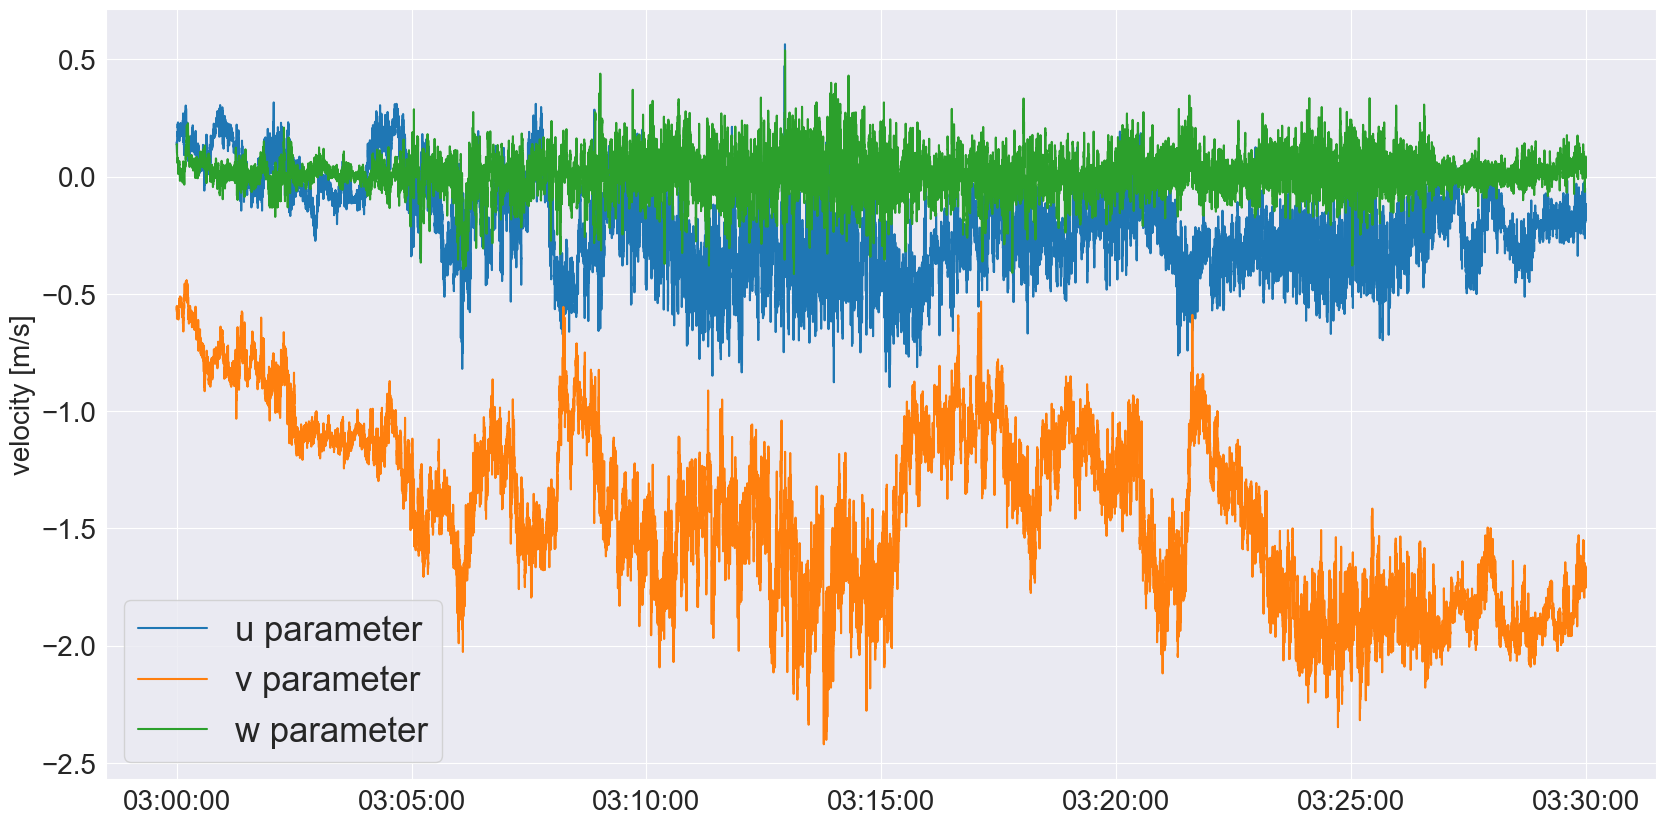

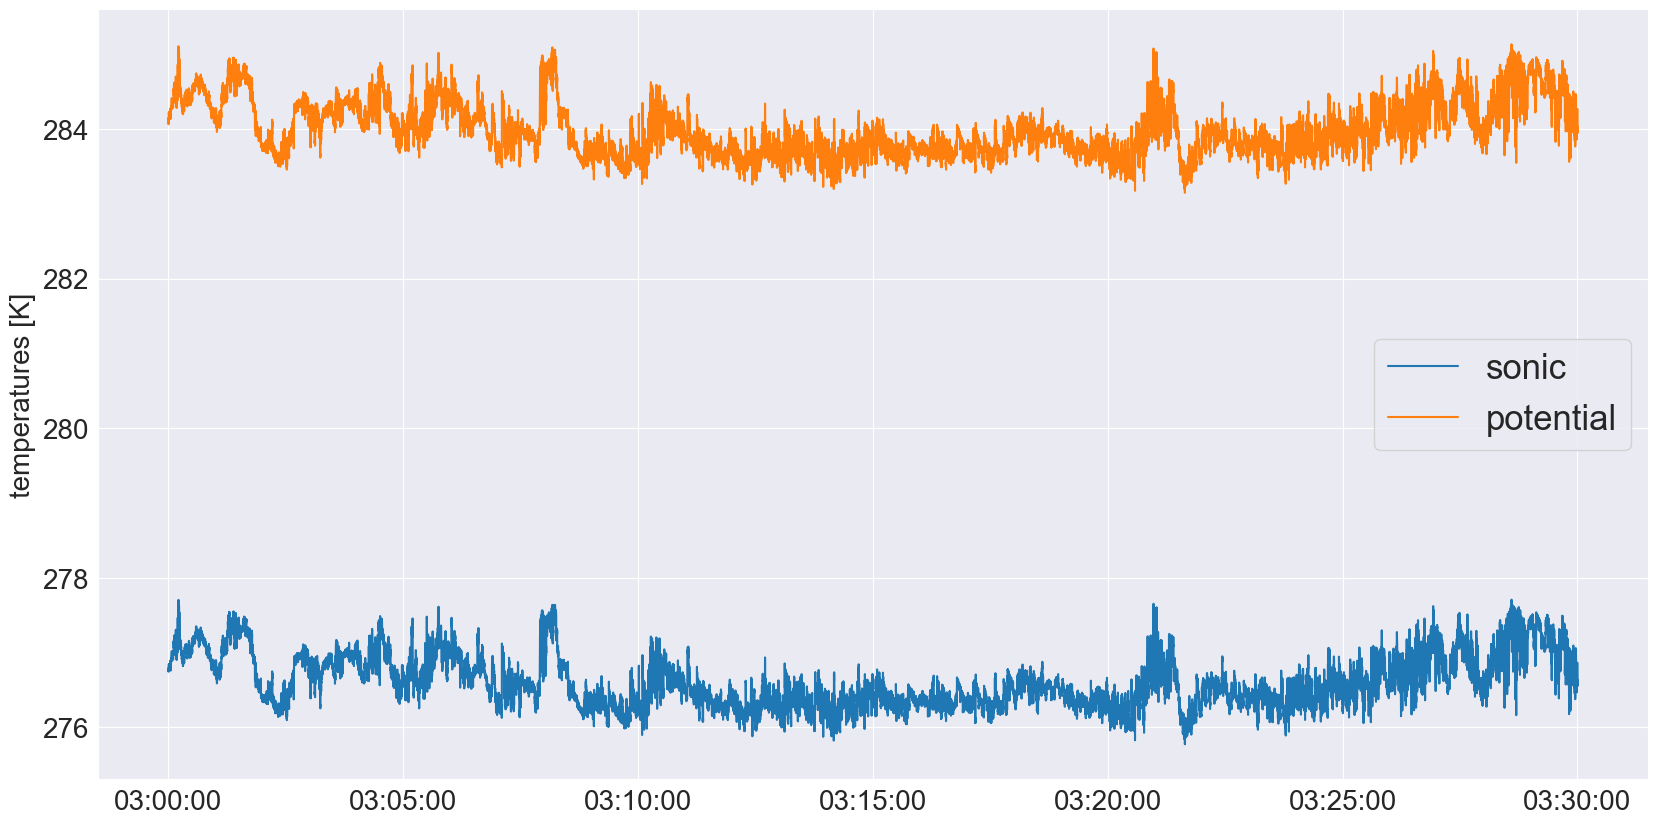

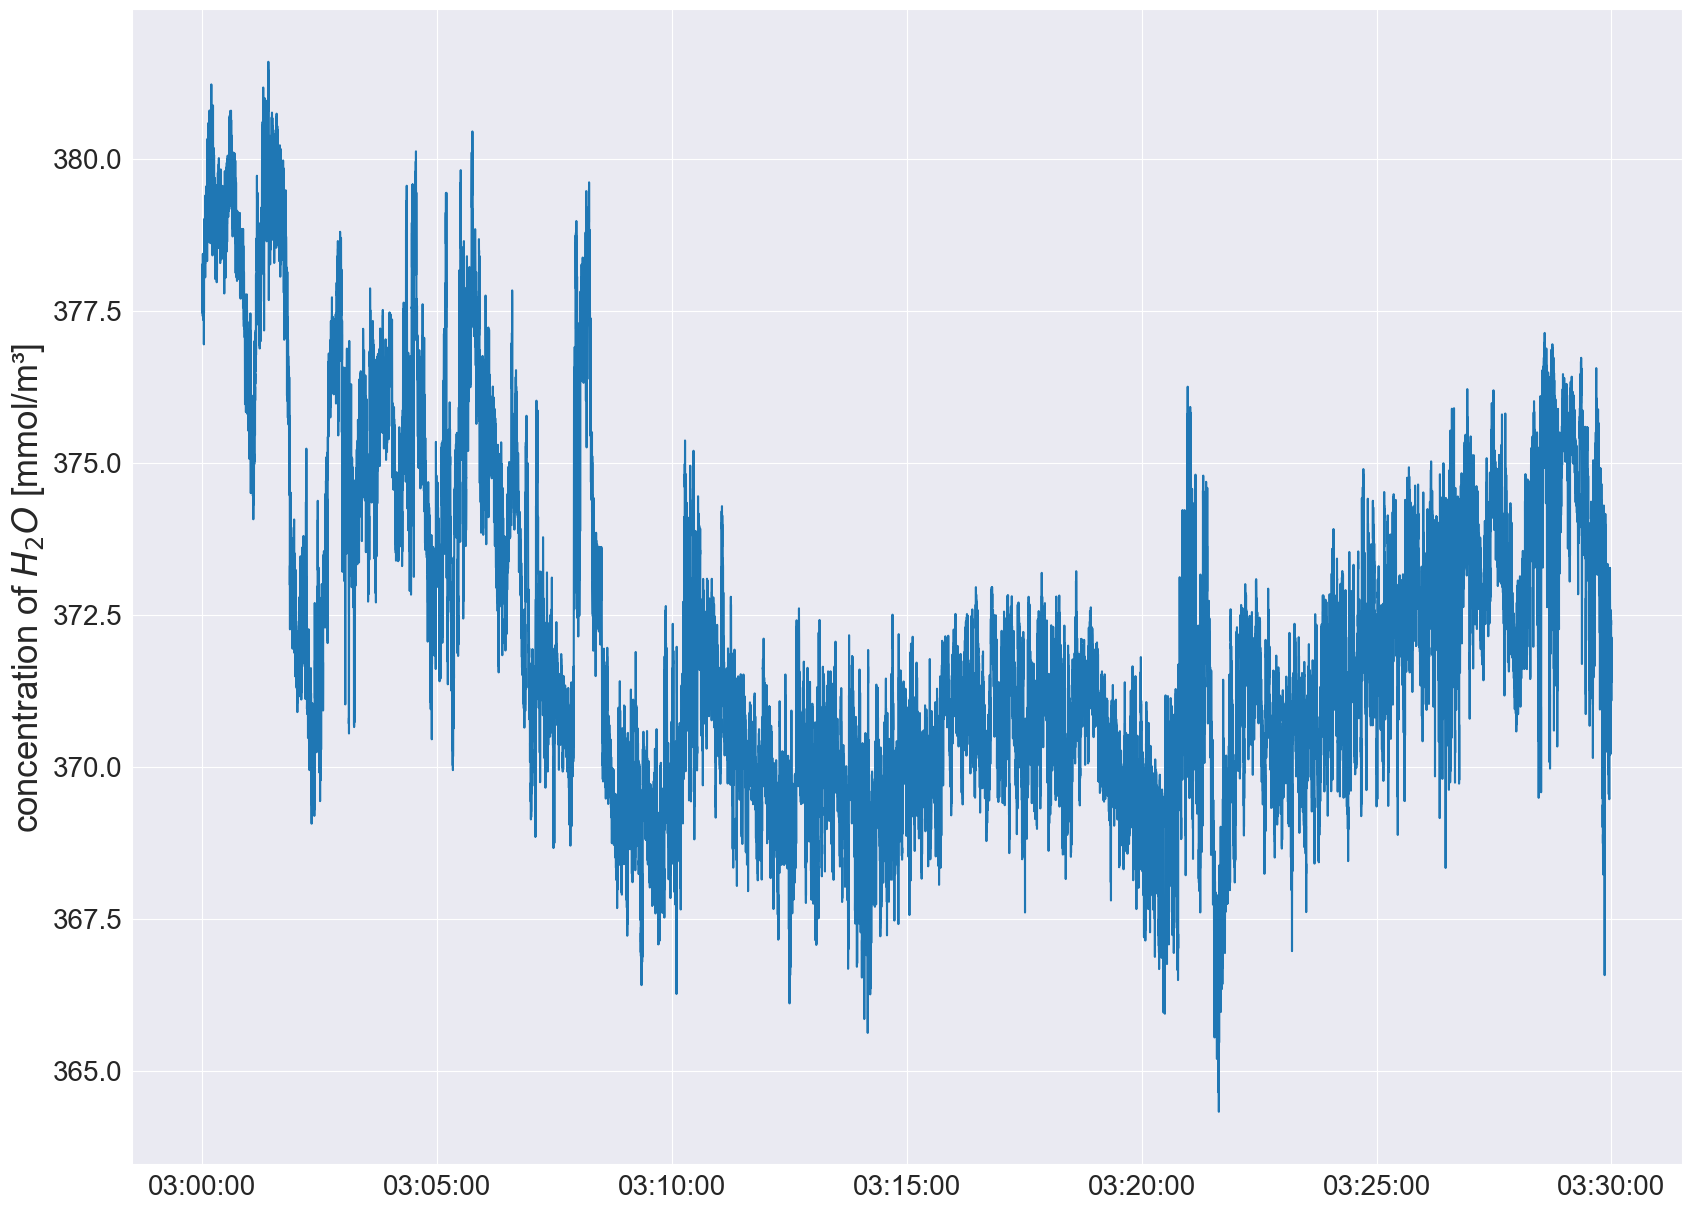

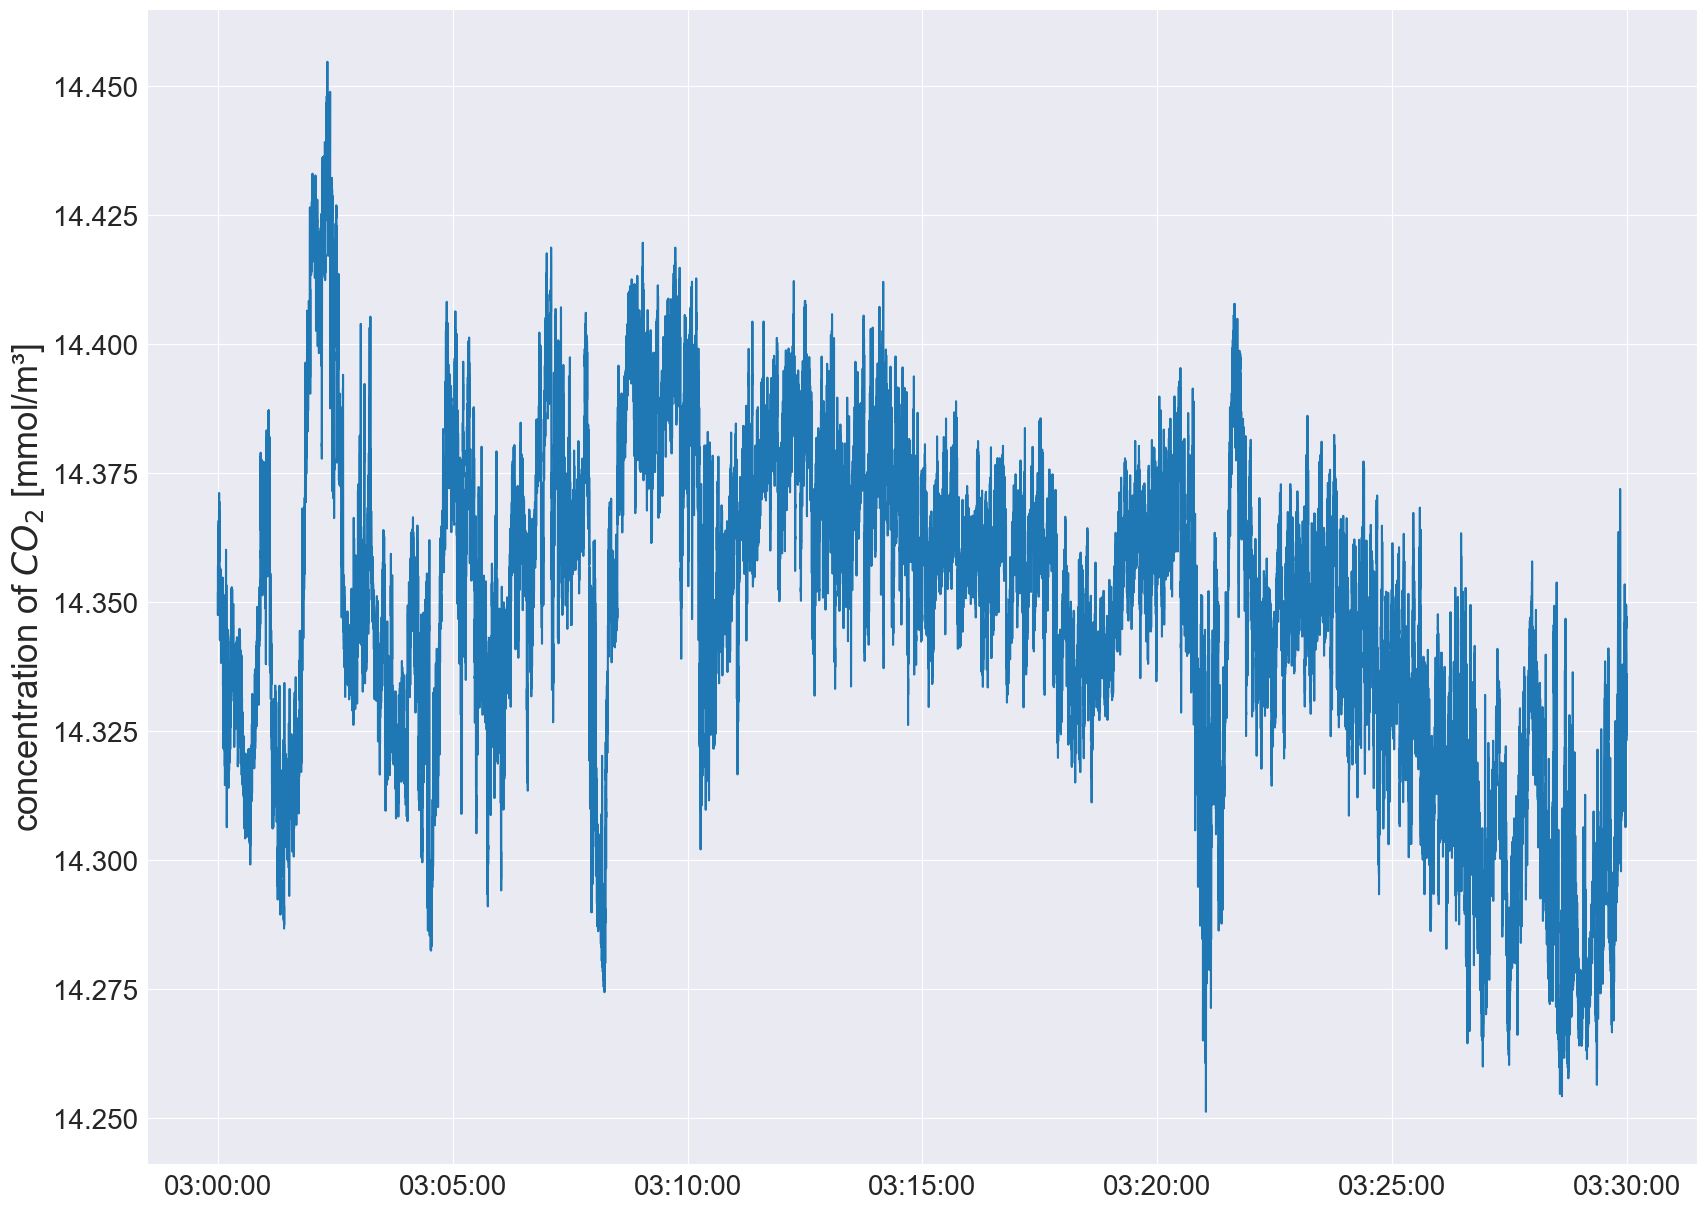

In [15]:
#oppgave 1

#velocity
plt.figure(figsize=(20,10))
plt.tick_params(axis='both', which='major', labelsize=20)
plt.plot(time, u, label = 'u parameter')
plt.plot(time, v, label = 'v parameter')
plt.plot(time, w, label = 'w parameter')
plt.ylabel('velocity [m/s]', fontsize=20)
timeFmt = mdates.DateFormatter('%H:%M:%S')
plt.gca().xaxis.set_major_formatter(timeFmt)
plt.legend(fontsize=25)

#temperature
plt.figure(figsize=(20,10))
plt.tick_params(axis='both', which='major', labelsize=20)
plt.plot(time, sonic_t, label = 'sonic')
plt.plot(time, potential_t, label = 'potential')
plt.ylabel('temperatures [K]', fontsize=20)
timeFmt = mdates.DateFormatter('%H:%M:%S')
plt.gca().xaxis.set_major_formatter(timeFmt)
plt.legend(fontsize=25)

#concentrations
plt.figure(figsize=(20,15))
plt.plot(time, h2o)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.ylabel('concentration of $H_2O$ [mmol/m\u00b3]', fontsize=25)
timeFmt = mdates.DateFormatter('%H:%M:%S')
plt.gca().xaxis.set_major_formatter(timeFmt)

plt.figure(figsize=(20,15))
plt.plot(time, co2)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.ylabel('concentration of $CO_2$ [mmol/m\u00b3]', fontsize=25)
timeFmt = mdates.DateFormatter('%H:%M:%S')
plt.gca().xaxis.set_major_formatter(timeFmt)

In [45]:
#Oppgave 2 - 3C


#Variance
varians = np.var(df)

varians_detrent = signal.detrend(varians)

print("Oppgave 2:")
print("Variansen for alle komponenter:", "\n")
# print(varians)
pot_prime = potential_t - np.mean(potential_t)
w_prime = w - np.mean(w)

#Konverter vanndampkonsentrasjon 
dry_air_density_kg_per_m3 = 1.225  # Example value (dry air density at certain conditions)
molar_mass_h2o = 18.01528/1000  # Molar mass of water (H2O) in kg/mol
conversion_factor_mol = 1e-3
# Calculate the mass of water vapor in kg/m³
mass_water_vapor_kg_per_m3 = (h2o*conversion_factor_mol) * molar_mass_h2o
# Calculate specific humidity (q) in kg of water vapor per kg of dry air
q = mass_water_vapor_kg_per_m3 / dry_air_density_kg_per_m3
q_prime = q - np.mean(q)


print("\n")
print("oppgave 3a:")
verticle_mean_flux = (np.sum(pot_prime * w_prime)/n)*(1005*1.2) #*1005*1.2 for luft for å få H 
print("Average vertical heat flux: ", round(verticle_mean_flux,4), "[Wm^-2]")

print("Oppgave 3b:")
turbulent_vertical_moisture_flux = (np.sum(w_prime*(1000*q_prime))/(n))*1005*1.2 #*1000*q' for å få g/kg, *1005*1.2 for å få H. 
print("Turbulent vertical moisture flux: ", round(turbulent_vertical_moisture_flux,4), "[Wm^-2]")

#Turbulent vertical momentum fluxes (u and v component) and the friction velocity 

u_prime = u - np.mean(u)
v_prime = v - np.mean(v)

mom_flux_u = np.sum(u_prime * w_prime)/n
mom_flux_v = np.sum(v_prime * w_prime)/n


#Friction velocity mu_*:
mu = (mom_flux_u**2 + mom_flux_v**2)**(1/4)
print("Oppgave 3c:")
print("Vertical momentum flux u component:", round(mom_flux_u, 6))
print("Vertical momentum flux v component:", round(mom_flux_v, 6))
print("Friction velocity mu_*:", round(mu, 4))

#Oppgave 3D: TKE per enhetsmasse
tke = (1/2)*(np.sum(u_prime**2)/n + np.sum(v_prime**2)/n + np.sum(w_prime**2)/n)

print("Oppgave 3D:")
print("TKE per enhetsmasse:", round(tke, 4))

#Oppgave 3E: L og zeta
df[9] = potential_t / (1-(q/1000))
potential_v_t = df[9]

# derivert_potential_v_t = np.diff(potential_v_t)/time_step
potential_v_t_prime = potential_v_t - np.mean(potential_v_t)

L = -(np.sum(potential_v_t)/n*mu**3)/(0.4*9.81*(np.sum(w_prime*potential_v_t_prime)/n))
zeta = 2.13/L
print("Oppgave 3E:")
print("The Obukhov length L: ", round(L, 4), "-> Stable because L > 0")
print("Stability paramter zeta:", round(zeta, 4))

#Oppgave 3F: theta stjerne SL:
surface_layer_t = -(np.sum(w_prime*pot_prime)/n)/mu
print("Oppgave 3F:")
print("Surface layer potential temperature:", round(surface_layer_t, 4))


Oppgave 2:
Variansen for alle komponenter: 



oppgave 3a:
Average vertical heat flux:  -4.5949 [Wm^-2]
Oppgave 3b:
Turbulent vertical moisture flux:  -0.4089 [Wm^-2]
Oppgave 3c:
Vertical momentum flux u component: 0.000562
Vertical momentum flux v component: 0.000139
Friction velocity mu_*: 0.0241
Oppgave 3D:
TKE per enhetsmasse: 0.0924
Oppgave 3E:
The Obukhov length L:  0.2645 -> Stable because L > 0
Stability paramter zeta: 8.0533
Oppgave 3F:
Surface layer potential temperature: 0.1584


In [ ]:
#Oppgave 4:
corr_u_w= np.corrcoef(u,w)[0,1]
corr_v_w= np.corrcoef(v,w)[0,1]
corr_w_T= np.corrcoef(w,sonic_t)[0,1]
corr_w_q = np.corrcoef(w,q)[0,1]


# Plot for correlation map:
data = np.array([
    [corr_w_q, corr_v_w],
    [corr_w_T, corr_u_w]
])

cmap = sns.light_palette("green", as_cmap=True)
plt.figure(figsize=(8, 4))
sns.heatmap(data, annot=True, fmt=".4f", cmap=cmap, vmin=-0.2, vmax=0.1, cbar_kws={'label': 'Correlation'})

plt.title('Correlation Map', fontsize = 16)
plt.xticks(ticks=[0.5, 1.5], labels=[" ", " "])
plt.yticks(ticks=[0.5, 1.5], labels=[" ", " "])
plt.text(0.5, 0.6, '$Corr(w, q)$', ha='center', va='top', color='black')
plt.text(1.5, 0.6, '$Corr(v, w)$', ha='center', va='top', color='white')
plt.text(0.5, 1.6, '$Corr(w, T)$', ha='center', va='top', color='black')
plt.text(1.5, 1.6, '$Corr(u, w)$', ha='center', va='top', color='white')
plt.savefig("correlationmap.png", dpi = 300)
plt.show()


C:\Users\lepso\AppData\Local\Temp\ipykernel_10292\598095196.py:22: RuntimeWarning: divide by zero encountered in log
  plt.plot(x, np.exp(-np.log(x*10**8) + np.log(x[-1] * k)), label='-5/3', color="red")
C:\Users\lepso\AppData\Local\Temp\ipykernel_10292\598095196.py:22: RuntimeWarning: invalid value encountered in log
  plt.plot(x, np.exp(-np.log(x*10**8) + np.log(x[-1] * k)), label='-5/3', color="red")
C:\Users\lepso\AppData\Local\Temp\ipykernel_10292\598095196.py:23: RuntimeWarning: divide by zero encountered in log
  plt.plot(x, np.exp(-np.log(x*0.1) + np.log(x[-1] * -m_w)), label=f'Polyfit: {m_w}', color="yellowgreen")


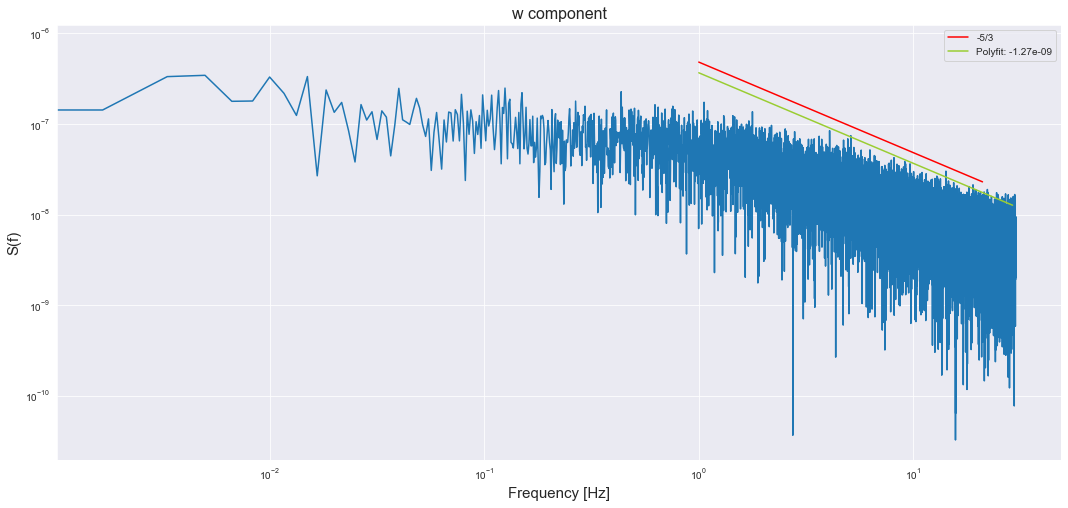

C:\Users\lepso\AppData\Local\Temp\ipykernel_10292\598095196.py:38: RuntimeWarning: divide by zero encountered in log
  plt.plot(x, np.exp(-np.log(x*10**12) + np.log(x[-1] * k)), label='-5/3', color="red")
C:\Users\lepso\AppData\Local\Temp\ipykernel_10292\598095196.py:39: RuntimeWarning: divide by zero encountered in log
  plt.plot(x, np.exp(-np.log(x*10) + np.log(x[-1] * -m_q)), label=f'Polyfit: {m_q}', color="yellowgreen")


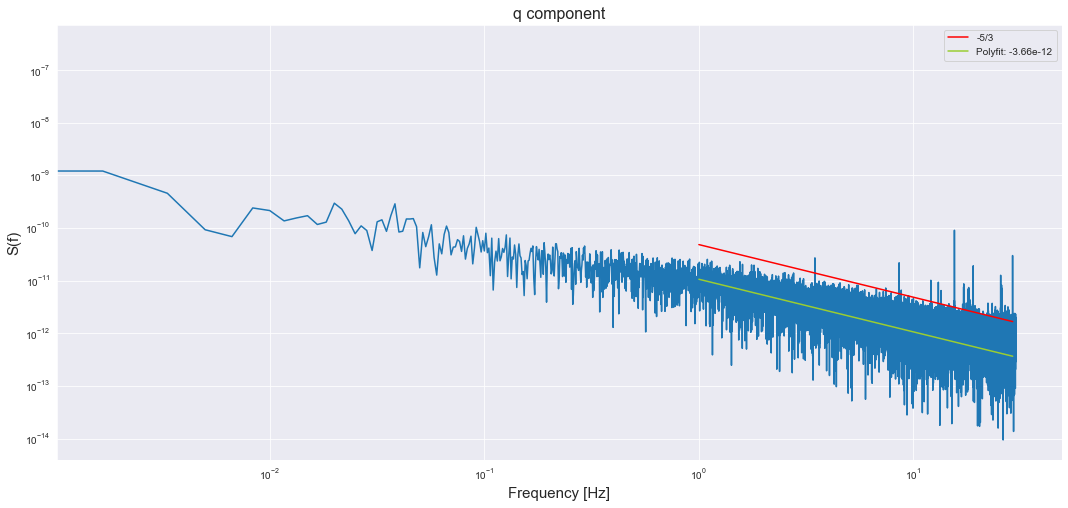

C:\Users\lepso\AppData\Local\Temp\ipykernel_10292\598095196.py:52: RuntimeWarning: divide by zero encountered in log
  plt.plot(x, np.exp(-np.log(x*10**8) + np.log(x[-1] * k)), label='-5/3',color="red")
C:\Users\lepso\AppData\Local\Temp\ipykernel_10292\598095196.py:52: RuntimeWarning: invalid value encountered in log
  plt.plot(x, np.exp(-np.log(x*10**8) + np.log(x[-1] * k)), label='-5/3',color="red")
C:\Users\lepso\AppData\Local\Temp\ipykernel_10292\598095196.py:53: RuntimeWarning: divide by zero encountered in log
  plt.plot(x, np.exp(-np.log(x*100) + np.log(x[-1] * -m_t)), label=f'Polyfit: {m_t}', color="yellowgreen")


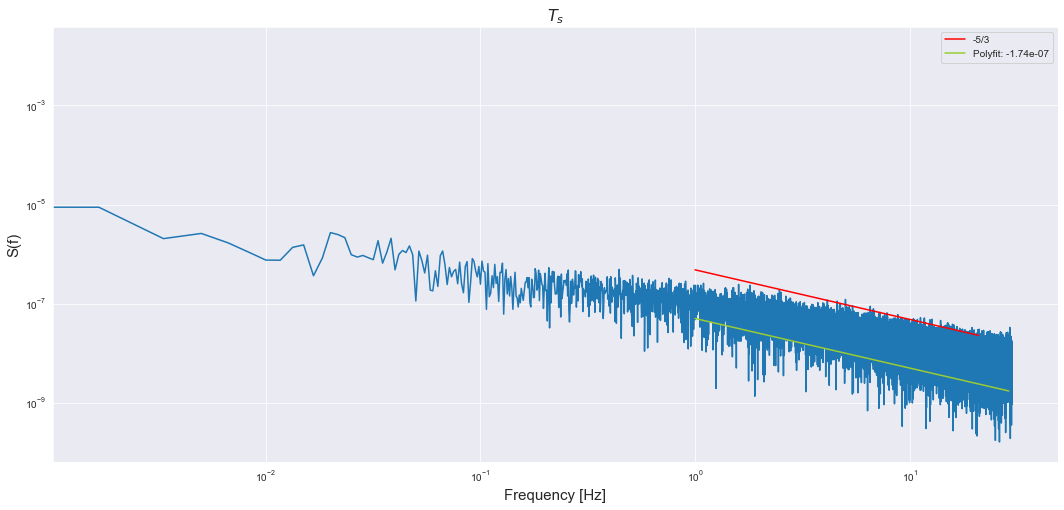

In [43]:
#Oppgave 5 funksjon

N = len(df)
T = 1/20
P = 30
freq = np.linspace(0, 30, N//2)
x = np.arange(0,30)
k = 5/3

def fourier_spectral_density(data):
    fft_komponent = np.fft.fft(data)/N
    m,b = np.polyfit(freq,2/N * np.abs(fft_komponent[0:N//2]),1)
    m_fin = "{:.2e}".format(m)
    
    return fft_komponent, float(m_fin)
    
w_komponent, m_w = fourier_spectral_density(w)


plt.figure(figsize=(18,8))
plt.plot(freq, 2/N * np.abs(w_komponent[0:N//2]))
plt.plot(x, np.exp(-np.log(x*10**8) + np.log(x[-1] * k)), label='-5/3', color="red")
plt.plot(x, np.exp(-np.log(x*0.1) + np.log(x[-1] * -m_w)), label=f'Polyfit: {m_w}', color="yellowgreen")
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Frequency [Hz]', fontsize=15)
plt.ylabel('S(f)', fontsize=15)
plt.title('w component', fontsize=16)
plt.legend()
# plt.savefig('w_fft.png', dpi = 300)
plt.show()



q_komponent, m_q = fourier_spectral_density(q)
plt.figure(figsize=(18,8))
plt.plot(freq, 2/N * np.abs(q_komponent[0:N//2]))
plt.plot(x, np.exp(-np.log(x*10**12) + np.log(x[-1] * k)), label='-5/3', color="red")
plt.plot(x, np.exp(-np.log(x*10) + np.log(x[-1] * -m_q)), label=f'Polyfit: {m_q}', color="yellowgreen")
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Frequency [Hz]', fontsize=15)
plt.ylabel('S(f)', fontsize=15)
plt.title('q component', fontsize=16)
plt.legend()
# plt.savefig('q_fft.png', dpi = 300)
plt.show()

t_komponent, m_t = fourier_spectral_density(sonic_t)
plt.figure(figsize=(18,8))
plt.plot(freq, 2/N * np.abs(t_komponent[0:N//2]))
plt.plot(x, np.exp(-np.log(x*10**8) + np.log(x[-1] * k)), label='-5/3',color="red")
plt.plot(x, np.exp(-np.log(x*100) + np.log(x[-1] * -m_t)), label=f'Polyfit: {m_t}', color="yellowgreen")
plt.yscale('log')
plt.xscale('log')
# plt.ylim(10**(-15),10**(-8))
plt.xlabel('Frequency [Hz]', fontsize=15)
plt.ylabel('S(f)', fontsize=15)
plt.title('$T_s$', fontsize=16)
plt.legend()
# plt.savefig('T_fft.png', dpi = 300)
plt.show()